In [1]:
import hopsworks

hopsworks.login()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196772


Project('uni', 'filip.zawadka@hotmail.com', 'Default project')

In [9]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!!"

iface = gr.Interface(fn=greet,inputs="text",outputs="text")
iface.launch()

In [1]:
import gradio as gr
from PIL import Image
import requests
import hopsworks
import joblib
import pandas as pd
import os

project = hopsworks.login()
fs = project.get_feature_store()


mr = project.get_model_registry()
model = mr.get_model("iris_model", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")
print("Model downloaded")

def iris(sepal_length, sepal_width, petal_length, petal_width):
    print("Calling function")
#     df = pd.DataFrame([[sepal_length],[sepal_width],[petal_length],[petal_width]], 
    df = pd.DataFrame([[sepal_length,sepal_width,petal_length,petal_width]], 
                      columns=['sepal_length','sepal_width','petal_length','petal_width'])
    print("Predicting")
    print(df)
    # 'res' is a list of predictions returned as the label.
    res = model.predict(df) 
    # We add '[0]' to the result of the transformed 'res', because 'res' is a list, and we only want 
    # the first element.
#     print("Res: {0}").format(res)
    print(res)
    flower_url = "https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/" + res[0] + ".png"
    img = Image.open(requests.get(flower_url, stream=True).raw)            
    return img
        
demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=2.0, label="sepal length (cm)"),
        gr.inputs.Number(default=1.0, label="sepal width (cm)"),
        gr.inputs.Number(default=2.0, label="petal length (cm)"),
        gr.inputs.Number(default=1.0, label="petal width (cm)"),
        ],
    outputs=gr.Image(type="pil")
    )

demo.launch(debug=True)

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196772
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


Model downloaded


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']


Traceback (most recent call last):
  File "/home/filip_praca/anaconda3/envs/ml/lib/python3.10/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/home/filip_praca/anaconda3/envs/ml/lib/python3.10/site-packages/urllib3/util/connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/home/filip_praca/anaconda3/envs/ml/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/filip_praca/anaconda3/envs/ml/lib/python3.10/site-packages/urllib3/connectionpool.py", line 715, in urlopen
    httplib_response = self._make_request(
  File "/home/filip_praca/anaconda3/envs/ml/lib/python3.10/site-packages/urllib3/connectio

Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           2.0          1.0
['Setosa']
Calling function
Predicting
   sepal_length  sepal_width  petal_length  petal_width
0         

In [15]:
gr.components.Image()

image

In [18]:
gr.components.Image("latest_iris.png", elem_id="predicted-img")

image

In [3]:
!ls /tmp/0545c749-b541-40a2-bf24-e9c816271370/iris_model/1

confusion_matrix.png  iris_model.pkl  model_schema.json


In [4]:
gr.inputs.Number(default=2.0, label="sepal length (cm)")

number

In [8]:
gr.components.Number(default=2.0, label="sepal length (cm)")

number

In [9]:
gr.components.Number(default=2.0, label="sepal length (cm)")

number

In [21]:
import gradio as gr
from PIL import Image
import hopsworks
import os

project = hopsworks.login()
fs = project.get_feature_store()

dataset_api = project.get_dataset_api()

dataset_api.download("Resources/images/latest_iris.png")

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196772
Connected. Call `.close()` to terminate connection gracefully.


RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/196772/dataset/Resources%2Fimages%2Flatest_iris.png). Server response: 
HTTP code: 400, HTTP reason: Bad Request, body: b'{"errorCode":110018,"errorMsg":"Path not found"}', error code: 110018, error msg: Path not found, user msg: 

In [24]:
dataset_api.download

<bound method DatasetApi.download of <hopsworks.core.dataset_api.DatasetApi object at 0x7fc013003430>>

In [25]:
import modal

In [10]:
import pandas as pd
import hopsworks
import joblib
import datetime
from PIL import Image
from datetime import datetime
import dataframe_image as dfi
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import seaborn as sns
import requests
import os

project = hopsworks.login()
fs = project.get_feature_store()

mr = project.get_model_registry()
model = mr.get_model("iris_model", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

feature_view = fs.get_feature_view(name="iris", version=1)
batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)
#print(y_pred)
offset = 1
flower = y_pred[y_pred.size-offset]
flower_url = "https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/" + flower + ".png"
print("Flower predicted: " + flower)
img = Image.open(requests.get(flower_url, stream=True).raw)            
img.save("./latest_iris.png")
dataset_api = project.get_dataset_api()    
dataset_api.upload("./latest_iris.png", "Resources/images", overwrite=True)

iris_fg = fs.get_feature_group(name="iris", version=1)
df = iris_fg.read() 
#print(df)
label = df.iloc[-offset]["variety"]
label_url = "https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/" + label + ".png"
print("Flower actual: " + label)
img = Image.open(requests.get(label_url, stream=True).raw)            
img.save("./actual_iris.png")
dataset_api.upload("./actual_iris.png", "Resources/images", overwrite=True)

monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                            version=1,
                                            primary_key=["datetime"],
                                            description="Iris flower Prediction/Outcome Monitoring"
                                            )

now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
data = {
    'prediction': [flower],
    'label': [label],
    'datetime': [now],
    }
monitor_df = pd.DataFrame(data)
monitor_fg.insert(monitor_df, write_options={"wait_for_job" : False})

history_df = monitor_fg.read()
# Add our prediction to the history, as the history_df won't have it - 
# the insertion was done asynchronously, so it will take ~1 min to land on App
history_df = pd.concat([history_df, monitor_df])


df_recent = history_df.tail(4)
dfi.export(df_recent, './df_recent.png', table_conversion = 'matplotlib')
dataset_api.upload("./df_recent.png", "Resources/images", overwrite=True)

predictions = history_df[['prediction']]
labels = history_df[['label']]

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196772
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


Finished: Reading data from Hopsworks, using Hive (2.46s) 
Flower predicted: Versicolor


Uploading: 0.000%|          | 0/146443 elapsed<00:00 remaining<?

Finished: Reading data from Hopsworks, using Hive (1.89s) 
Flower actual: Versicolor


Uploading: 0.000%|          | 0/146443 elapsed<00:00 remaining<?

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: iris_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196772/jobs/named/iris_predictions_1_offline_fg_materialization/executions


Finished: Reading data from Hopsworks, using Hive (1.54s) 


Uploading: 0.000%|          | 0/28658 elapsed<00:00 remaining<?

In [41]:
data1 = {
'prediction': y_pred,
'label': list(df.variety),
'datetime': [now]*len(y_pred),
}

Uploading Dataframe: 0.00% |          | Rows 0/151 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: iris_predictions_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196772/jobs/named/iris_predictions_1_offline_fg_materialization/executions


Finished: Reading data from Hopsworks, using Hive (2.15s) 


Uploading: 0.000%|          | 0/29723 elapsed<00:00 remaining<?

Number of different flower predictions to date: 3


Uploading: 0.000%|          | 0/17854 elapsed<00:00 remaining<?

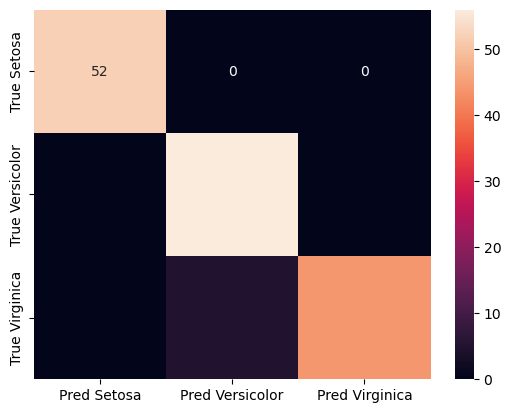

In [42]:
monitor_df = pd.DataFrame(data1)
monitor_fg.insert(monitor_df, write_options={"wait_for_job" : False})

history_df = monitor_fg.read()
# Add our prediction to the history, as the history_df won't have it - 
# the insertion was done asynchronously, so it will take ~1 min to land on App
history_df = pd.concat([history_df, monitor_df])


df_recent = history_df.tail(4)
dfi.export(df_recent, './df_recent.png', table_conversion = 'matplotlib')
dataset_api.upload("./df_recent.png", "Resources/images", overwrite=True)

predictions = history_df[['prediction']]
labels = history_df[['label']]

# Only create the confusion matrix when our iris_predictions feature group has examples of all 3 iris flowers
print("Number of different flower predictions to date: " + str(predictions.value_counts().count()))
if predictions.value_counts().count() == 3:
    results = confusion_matrix(labels, predictions)

    df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                            ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

    cm = sns.heatmap(df_cm, annot=True)
    fig = cm.get_figure()
    fig.savefig("./confusion_matrix.png")
    dataset_api.upload("./confusion_matrix.png", "Resources/images", overwrite=True)